### **Introduction**
  This dataset contains sales details of 4 years of one of the biggest US Superstore. Data has customer information, Order Detail, shipping detail, location information, Store information and sales and information.

The objectives of this project is to perform various data analysis activites such as data mining, data cleaning and preparation, statistical analysis and data visualization, To explore Sales matrix and find insights that can be helpful in further decision making for growth of the company.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
sales_df = pd.read_csv('Sample - Superstore.csv', encoding='windows-1254')
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [46]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [47]:
# unique values of each coloumns.
sales_df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

**Dataset Overview :**

- This data has 20 coloumns and 9994 rows.
- There are no null values in the dataset.
- Data contains both numeric and categorical values as well as discrete and continuous. 


**Variables Overview :**
- Data has customer information, Sales information, store details, sales and profit amount, discounts, location data, etc.
- There are 5009 unique ID. The data contain information of 49 US states and 531 cities. 
- Products from 3 category and 17 sub - categories. 

---



###  Data Cleaning and Preparation

In [48]:
sales_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64



> This data contain no null values.



Converting order date and ship date coloumns into pandas datetime type.

In [49]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'])

In [50]:
#Checking whether it is converted or not. 
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n



---



statistical measures :

In [52]:
sales_col =['Sales', 'Profit', 'Quantity']
sales_df[sales_col].describe()

,Sales,Profit,Quantity
count,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,3.789574
std,623.245101,234.260108,2.225110
min,0.444000,-6599.978000,1.000000
25%,17.280000,1.728750,2.000000
50%,54.490000,8.666500,3.000000
75%,209.940000,29.364000,5.000000
max,22638.480000,8399.976000,14.000000






---



### **Analyzing and Visualizing data**
So after getting some overview of data let's now found relation and insights from data through correlation and visualization. 

Sales by Cities :

In [ ]:
city_df = sales_df.groupby(["City"])["Sales", "Profit"].sum()
topcity_df = city_df.nlargest(10, 'Sales')

Text(0.5, 1.0, 'Top Sales and Profit by Cities')

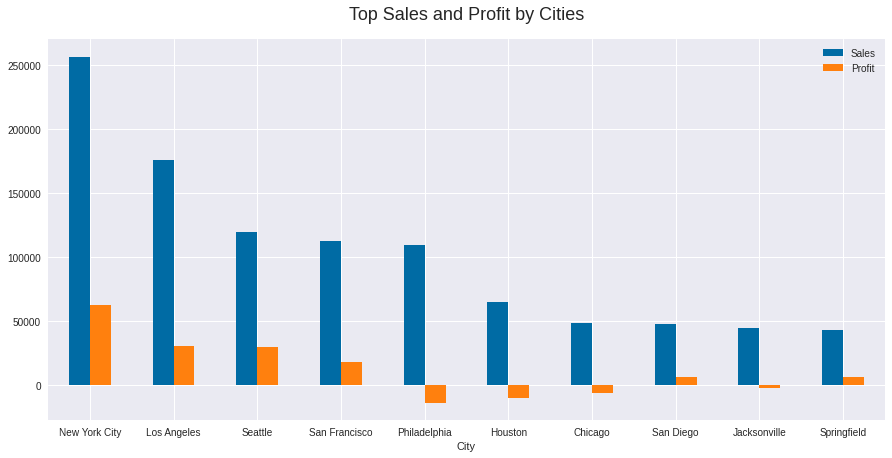

In [133]:
ax = topcity_df.plot.bar(figsize=[15,7], rot=0)
plt.title("Top Sales and Profit by Cities", size=18, pad=20)


New York City has highest sales, Followed by Los Angeles and Seattle.
* New York city : 256368.161(USD)
* Los Angeles : 175851.3410(USD)
* Seattle : 119540.7420(USD)

Top highest Profit was done by Cities
* New York city : 62036.9837(USD) 
* Los Angeles : 30440.7579(USD)
* Seattle : 29156.0967(USD) 





---



Sales by State :

In [ ]:
state_df = sales_df.groupby(["State"])["Sales", "Profit"].sum()
topstate_df = state_df.nlargest(10, 'Sales')

Text(0.5, 1.0, 'Top Sales and Profit by States')

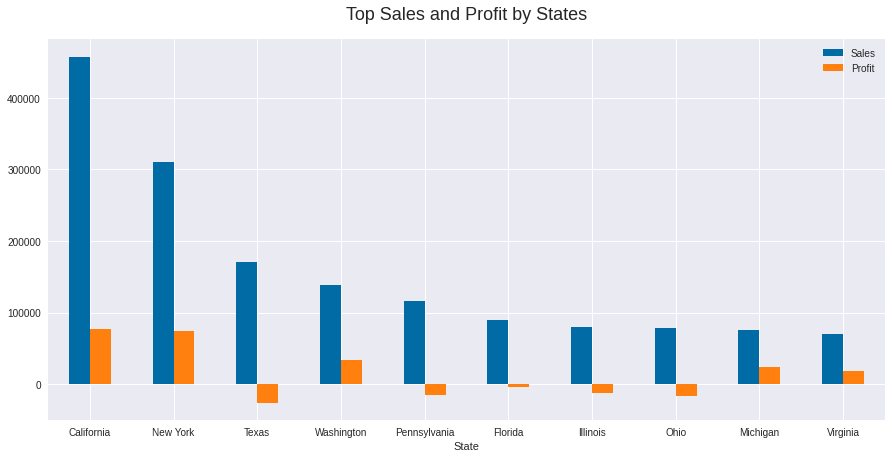

In [135]:
ax = topstate_df.plot.bar(figsize=[15,7], rot=0)
plt.title("Top Sales and Profit by States", size=18, pad=20)

California state has highest sales, Followed by New York and Texas.
* California : 256368.161(USD)
* New York : 310876.2710(USD)
* Texas : 170188.0458(USD)

Top highest Profit was done by categories
* Copiers : 55617.8249(USD) 
* Phones : 44515.7306(USD)
* Accessories : 41936.6357(USD)  



---



Sales and Profit by Product Category :

In [ ]:
productc_df = sales_df.groupby(["Sub-Category"])["Sales", "Profit"].sum()
productc_df = productc_df.nlargest(10, 'Sales')

Text(0.5, 1.0, 'Top Sales and Profit by Product Categories')

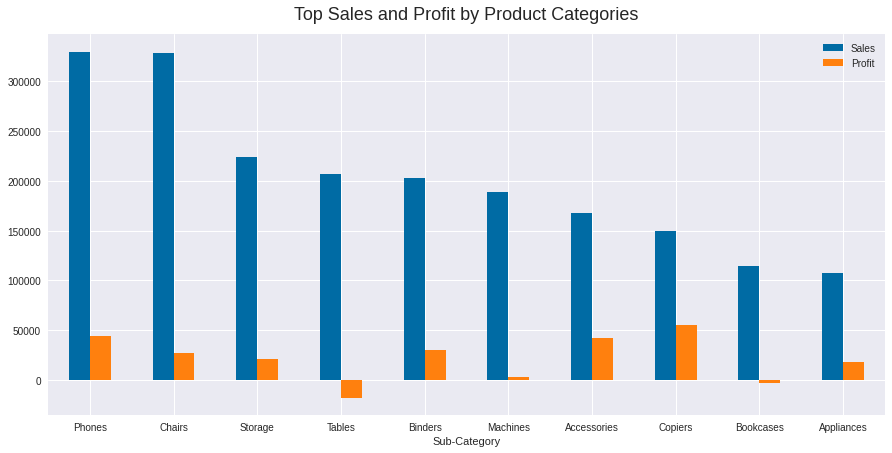

In [147]:
ax = productc_df.plot.bar(figsize=[15,7], rot=0)
plt.title("Top Sales and Profit by Product Categories", size=18, pad=15)

Phone has highest sales, Followed by Chairs and Storage.
* Phone : 330007.0540(USD)
* Chairs : 328449.1030(USD)
* Storage : 223843.6080(USD)

Top highest Profit was done by categories
* Copiers : 55617.8249(USD) 
* Phones : 44515.7306(USD)
* Accessories : 41936.6357(USD)  





---



Sales and Profit by Product Name :

In [ ]:
product_df = sales_df.groupby(["Product Name"])["Sales", "Profit"].sum()
product_df = product_df.nlargest(10, 'Sales')

In [151]:
# Top profit and Sales done by product.
product_df

,Sales,Profit
Product Name,,
Canon imageCLASS 2200 Advanced Copier,61599.824,2.519993e+04
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,7.753039e+03
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,-1.811078e+03
HON 5400 Series Task Chairs for Big and Tall,21870.576,5.684342e-14
GBC DocuBind TL300 Electric Binding System,19823.479,2.233505e+03
GBC Ibimaster 500 Manual ProClick Binding System,19024.500,7.609800e+02
Hewlett Packard LaserJet 3310 Copier,18839.686,6.983884e+03
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895,4.094977e+03
GBC DocuBind P400 Electric Binding System,17965.068,-1.878166e+03




---



Time vs Sales and Profit

In [ ]:
date_df = sales_df.groupby(["Order Date"])["Sales", "Profit"].sum()

Text(0.5, 1.0, 'Sales and Profit by Date')

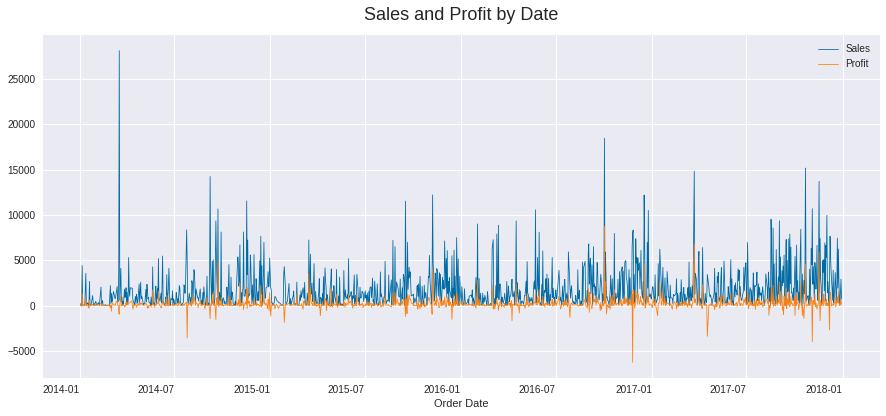

In [190]:
ax = date_df.plot.line(figsize=[15,7], rot=0, lw=0.8)
plt.title("Sales and Profit by Date", size=18, pad=15)

In [180]:
# Highest Sales.
date_df[date_df["Sales"]==date_df["Sales"].max()]

,Sales,Profit
Order Date,,
2014-03-18,28106.716,-954.7089




---



Sales and profit by year

In [ ]:
year_df = sales_df.groupby(sales_df['Order Date'].dt.year)["Sales", "Profit"].sum()


Text(0.5, 0, 'Year')

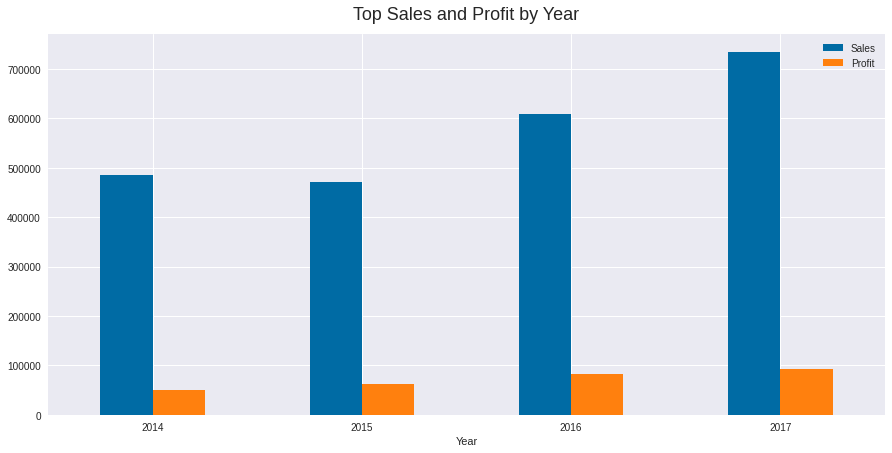

In [191]:
ax = year_df.plot.bar(figsize=[15,7], rot=0)
plt.title("Top Sales and Profit by Year", size=18, pad=15)
plt.xlabel("Year")

2017 experienced highest in terms of both Sales as well as profit.



---



Sales and Profit by Discount

In [ ]:
discount_df = sales_df.groupby(["Discount"])["Sales", "Profit"].sum()

Text(0.5, 1.0, 'Sales and Profit by Discount')

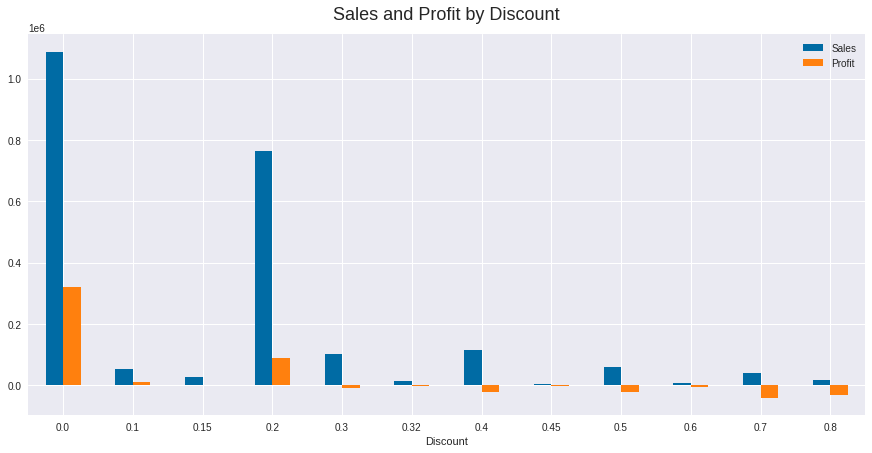

In [201]:
ax = discount_df.plot.bar(figsize=[15,7], rot=0, lw=0.8)
plt.title("Sales and Profit by Discount", size=18, pad=15)

This chart shows discount doesn't mean high profit or sales. Highest sales and profit are done by without giving any discount according to data. followed by 0.2% discount.


---



Sales and Profit by Ship Mode

In [ ]:
shipmode_df = sales_df.groupby(["Ship Mode"])["Sales", "Profit"].sum()

Text(0.5, 1.0, 'Sales and Profit by Ship Mode')

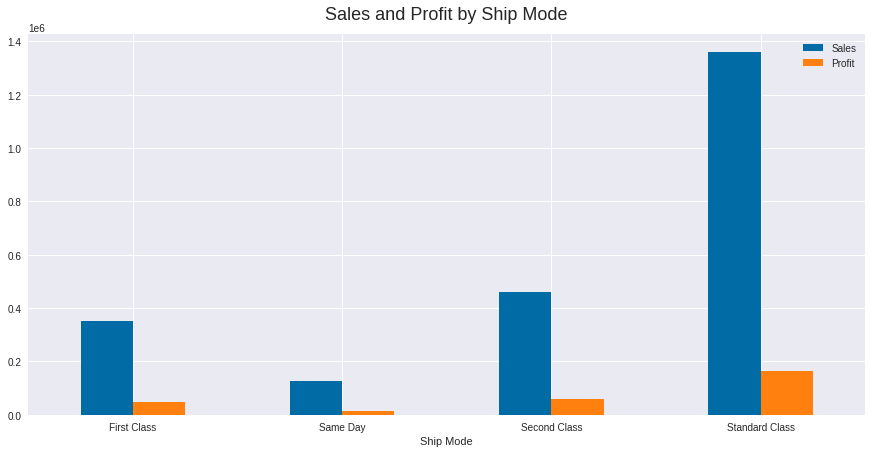

In [206]:
ax = shipmode_df.plot.bar(figsize=[15,7], rot=0, lw=0.8)
plt.title("Sales and Profit by Ship Mode", size=18, pad=15)

This chart shows intresting correlation between shipmode and sales. standard class shipmode customer did generate very huge sales and profit. This is very important insight for the future business growth.


---



**CONCLUSION :**

- I found some of the very important insights from the data.
- people with standard ship mode who are middel class and lower middel class people generate huge sales and profit for company.  
- New York city done highest sales and profit. California state done highest sales and profit in four years.
- Canon imageCLASS 2200 Advanced Copier did highest sales among product of	61599.824(USD).
- Phone does highes sales while Copiers done highest profit. 
- 2017 year experienced highest sales and profit.
- From data I found that highest sales and profit were doen by without discount.
- Business should take this insights into consideration while desicin making. 
  